In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

from sklearn.ensemble import GradientBoostingRegressor

**Import Dataset**


In [ ]:
balldf = pd.read_csv('/content/drive/Shareddrives/DIR_SHARED/IPL Ball-by-Ball 2008-2020.csv')
matchdf = pd.read_csv('/content/drive/Shareddrives/DIR_SHARED/IPL Matches 2008-2020.csv')

#Data exploration

**IPL Ball-by-Ball dataset 2008 - 2020**

In [ ]:
balldf.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
balldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
balldf.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [ ]:
balldf.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

**Match Dataset 2008-2020**

In [ ]:
matchdf.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matchdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
matchdf.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


#Match Analytics for Batsman

**Which players have the most sixes in IPL?**

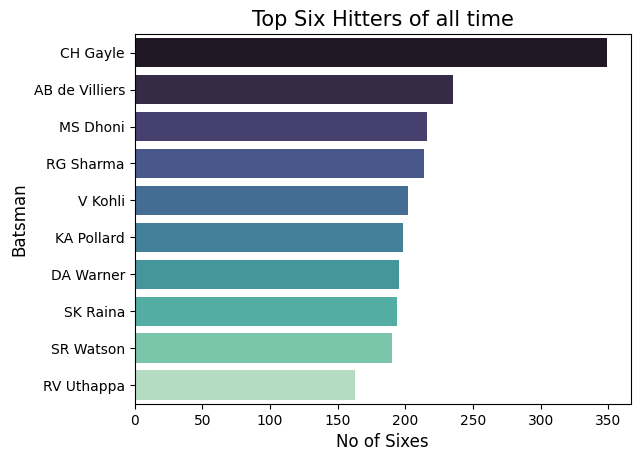

In [ ]:
batdf = pd.DataFrame()
batdf['6\'s'] = balldf[balldf['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()

batdf = batdf.reset_index()
top_10=batdf.sort_values(by=['6\'s'],ascending=False).head(10)

c1 = sns.barplot(data = top_10,y=top_10["batsman"], x=top_10["6\'s"],palette = 'mako')
plt.ylabel('Batsman',fontsize=12)
plt.xlabel('No of Sixes',fontsize=12)
plt.title('Top Six Hitters of all time',fontsize=15)
plt.show()


**Which players have the most runs with boundaries?**

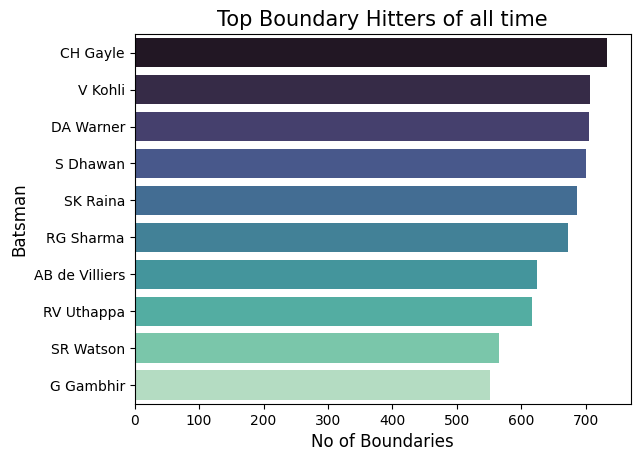

In [ ]:
four_six = balldf[balldf["batsman_runs"].isin([4,6])]
run_in_boundary = pd.DataFrame()
run_in_boundary['boundary'] = four_six.groupby('batsman')['batsman_runs'].count()

run_in_boundary = run_in_boundary.reset_index()
top_10=run_in_boundary.sort_values(by=['boundary'],ascending=False).head(10)

c1 = sns.barplot(data = top_10,y=top_10["batsman"], x=top_10["boundary"],palette = 'mako')
plt.ylabel('Batsman',fontsize=12)
plt.xlabel('No of Boundaries',fontsize=12)
plt.title('Top Boundary Hitters of all time',fontsize=15)
plt.show()


**Who is the top run scorers in ipl?**

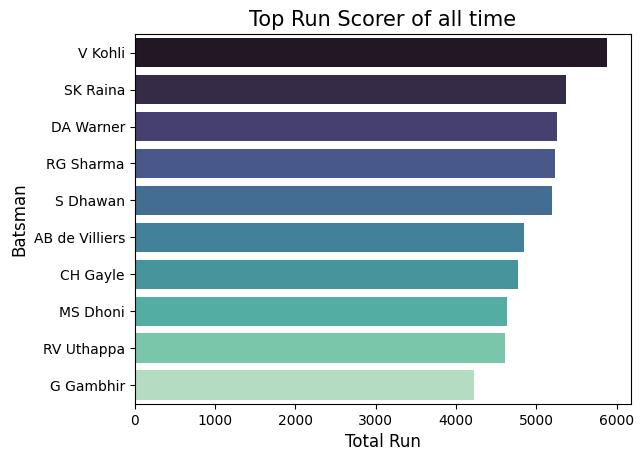

In [ ]:
total_runs=balldf.groupby('batsman').sum('batsman_runs')
top_10 = total_runs.sort_values(by=['batsman_runs'],ascending=False).head(10)

top_10 = top_10['batsman_runs'].reset_index()

c1 = sns.barplot(data = top_10,y=top_10["batsman"], x=top_10["batsman_runs"],palette = 'mako')
plt.ylabel('Batsman',fontsize=12)
plt.xlabel('Total Run',fontsize=12)
plt.title('Top Run Scorer of all time',fontsize=15)
plt.show()


**Which players have best strike rate in death overs?**

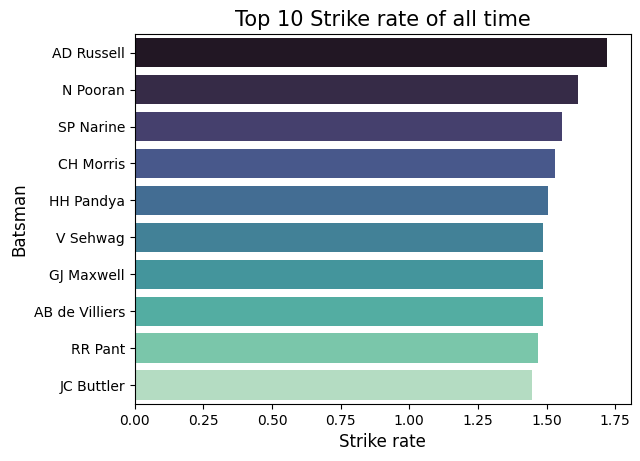

In [ ]:
death=balldf[ (balldf['over'].between(15,19))]
df_strikerate = balldf.groupby(['batsman']).agg({'ball':'count','batsman_runs':'sum'})

# Filtering players who has faced atleast 200 balls
top=df_strikerate[df_strikerate['ball'] > 200]
top = top.reset_index()
top['strike rate'] = top['batsman_runs']/top['ball']
top_10=top.sort_values(by='strike rate',ascending=False).head(10)

c1 = sns.barplot(data = top_10,y=top_10["batsman"], x=top_10["strike rate"],palette = 'mako')
plt.ylabel('Batsman',fontsize=12)
plt.xlabel('Strike rate',fontsize=12)
plt.title('Top 10 Strike rate of all time',fontsize=15)
plt.show()


**Which players have scored most runs in a single over (excluding extras like legbyes and byes)**

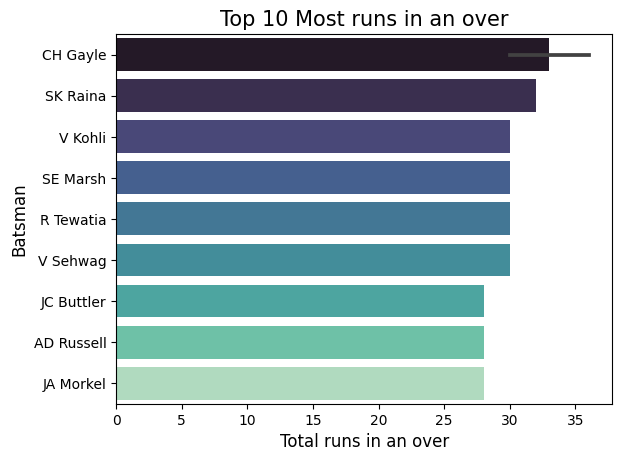

In [ ]:
runs_with_bat=balldf[~balldf.extras_type.isin(['legbyes','byes'])]

runs_with_bat = runs_with_bat.groupby(['id','batsman','over']).agg({'batsman_runs':'sum'})
top_10 = runs_with_bat.sort_values(by='batsman_runs',ascending=False).head(10)
top_10 = top_10.reset_index()

c1 = sns.barplot(data = top_10,y=top_10["batsman"], x=top_10["batsman_runs"],palette = 'mako')
plt.ylabel('Batsman',fontsize=12)
plt.xlabel('Total runs in an over',fontsize=12)
plt.title('Top 10 Most runs in an over',fontsize=15)
plt.show()

#Match Analytics for Bowler

In [ ]:
def barplot(ycol, xcol, ylabel, xlabel, title, temp):
  c1 = sns.barplot(data = temp, y = ycol, x = xcol, palette = 'mako')
  plt.ylabel(ylabel, fontsize=12)
  plt.xlabel(xlabel, fontsize=12)
  plt.title(title, fontsize=15)
  plt.show()

**Most expensive overs in IPL**

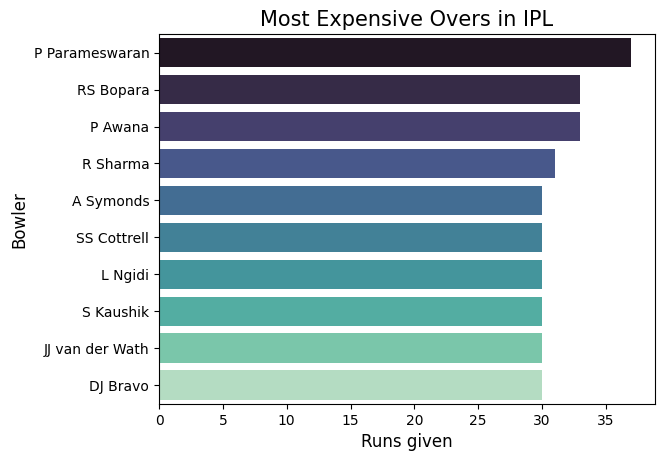

In [ ]:
mRunsOverdf = balldf.groupby(['id','bowler','over']).agg({'total_runs':'sum'}).sort_values(by=['total_runs'],ascending=False).reset_index()

tempdata = mRunsOverdf.head(10)

barplot(ycol="bowler", xcol="total_runs", ylabel="Bowler", xlabel="Runs given", title="Most Expensive Overs in IPL", temp=tempdata)

**Which bowlers have conceded least number of runs when bowled all 4 overs?**

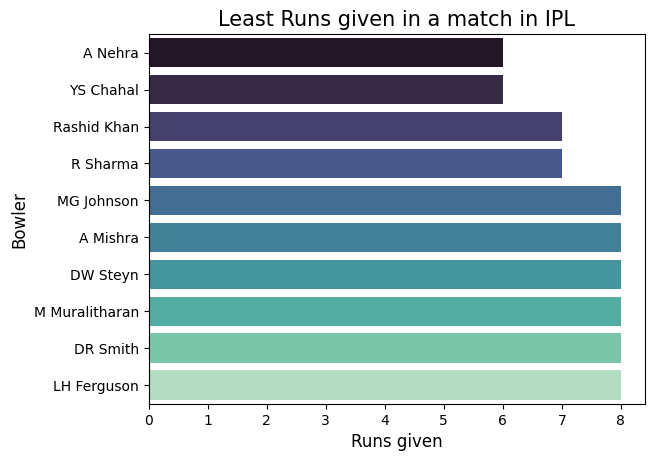

In [ ]:
leastRunsdf = balldf[~balldf.extras_type.isin(['legbyes','byes'])]
leastRunsdf = balldf.groupby(['id','bowler'])

leastRunsdf = leastRunsdf.agg({'ball':'count','total_runs':'sum'}).sort_values(by=['total_runs'],ascending=True).reset_index()
leastRunsdf = leastRunsdf[leastRunsdf['ball'] >= 24]

tempdata = leastRunsdf.head(10)

barplot(ycol="bowler", xcol="total_runs", ylabel="Bowler", xlabel="Runs given", title="Least Runs given in a match in IPL", temp=tempdata)

**Which bowlers has the best economy rate in ipl (only those who bowled minimum 20 overs)**

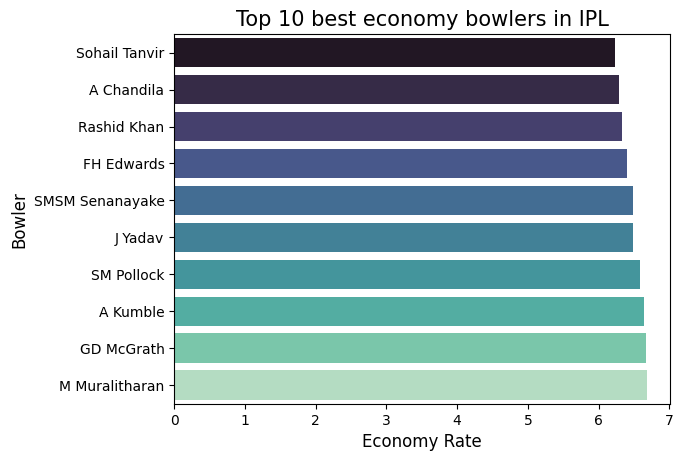

In [ ]:
ecodf = balldf[~balldf.extras_type.isin(['legbyes','byes'])]
ecodf = balldf.groupby('bowler')

ecodf = ecodf.agg({'ball':'count','total_runs':'sum'}).reset_index()
ecodf = ecodf[ecodf['ball'] >= 120]

ecodf['economy']=(ecodf['total_runs']/ecodf['ball'])*6
ecodf = ecodf.sort_values(by=['economy'], ascending=True)

tempdata = ecodf.head(10)
barplot(ycol="bowler", xcol="economy", ylabel="Bowler", xlabel="Economy Rate", title="Top 10 best economy bowlers in IPL", temp=tempdata)

**Which bowlers have taken most wickets in ipl?**

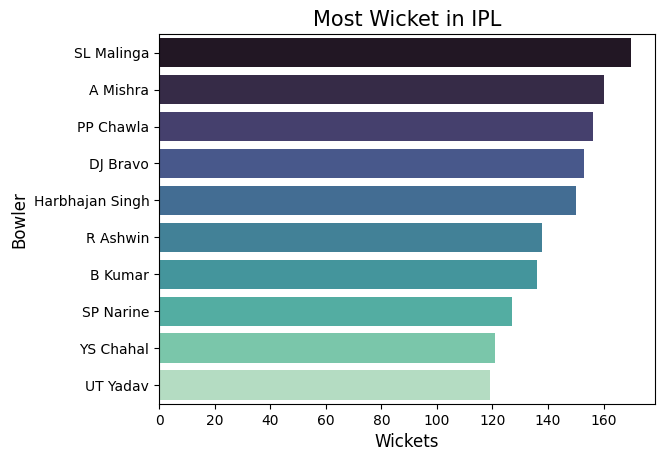

In [ ]:
high_wick_df = balldf[~balldf['dismissal_kind'].isin(['obstructing the field','run out']) ]#filtering out obstructing the field and run out dismissal kind 
high_wick_df = high_wick_df.groupby('bowler').agg({'is_wicket':'sum'}).reset_index()
high_wick_df = high_wick_df.sort_values(by=['is_wicket'], ascending = False)
high_wick_df

tempdata = high_wick_df.head(10)
barplot(ycol="bowler", xcol="is_wicket", ylabel="Bowler", xlabel="Wickets", title="Most Wicket in IPL", temp=tempdata)

# Match Analytics for Team

**Total matches played by the IPL teams**

In [ ]:
match_app=pd.concat([matchdf['team1'],matchdf['team2']])
match_app=match_app.value_counts().reset_index()
match_app.columns=['Team','Total Matches']
match_app

,Team,Total Matches
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


**Teams ranked on basis of winning toss**

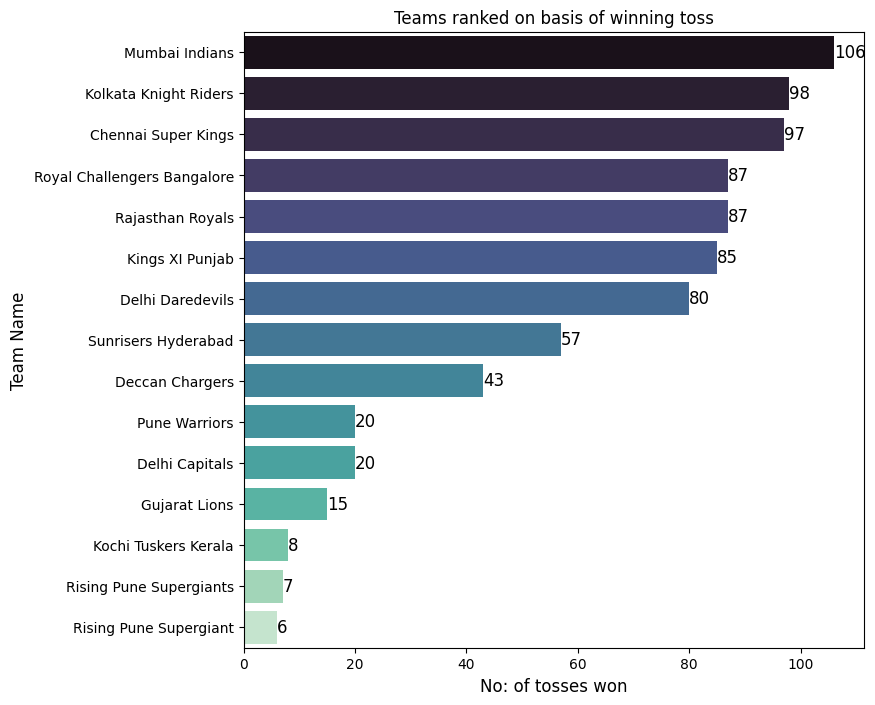

In [ ]:
toss_wins = matchdf['toss_winner'].value_counts()
plt.figure(figsize=(8,8))
c1 = sns.countplot(y='toss_winner',order=toss_wins.index,data = matchdf,palette = 'mako')
c1.bar_label(c1.containers[0],size = 12)
plt.ylabel('Team Name',fontsize=12)
plt.xlabel('No: of tosses won',fontsize=12)
plt.title('Teams ranked on basis of winning toss',fontsize=12)
plt.show()

**Toss Decision**

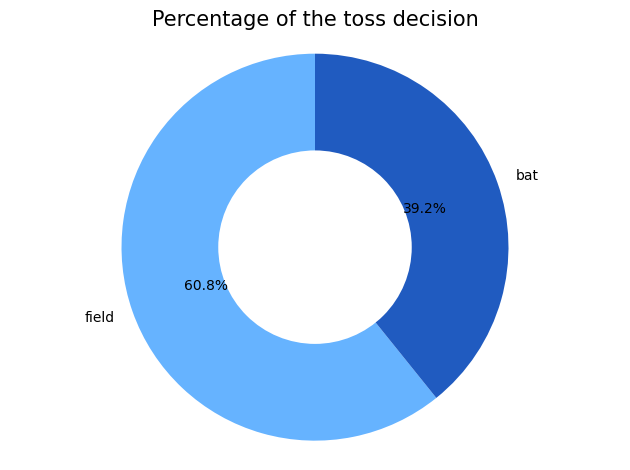

In [ ]:
labels = matchdf['toss_decision'].unique()
sizes =  matchdf['toss_decision'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of the toss decision",fontsize=15)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

**Inference:** Most of the teams which tends to win the toss opted to Field first.(60.8 %)

In [ ]:
team1 = 'Mumbai Indians'
team2 = 'Chennai Super Kings'
venue = 'Wankhede Stadium'

matchstatdf = matchdf[((matchdf.team1 == team1) & (matchdf.team2 == team2)) | ((matchdf.team1 == team2) & (matchdf.team2 == team1))]

# Number of matches played
totplay = matchstatdf.shape[0]

**Calculate percentage of toss wins for team1 and team2**

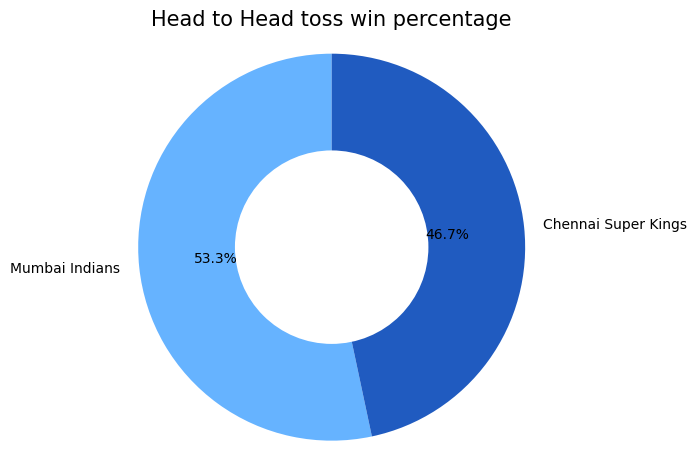

In [ ]:
# Calculate percentage of toss wins for team1 and team2
team1toss = len(matchstatdf[matchstatdf['toss_winner'] == team1])
team1tossper = (team1toss / totplay) * 100

team2toss = len(matchstatdf[matchstatdf['toss_winner'] == team2])
team2tossper = (team2toss / totplay) * 100

# Plot the data as a pie chart
slices = [team1toss, team2toss]
labels = [team1, team2]
colors = ['#66b3ff', '#205bc0', '#94b5ef']

fig1, ax1 = plt.subplots()
ax1.pie(slices, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Head to Head toss win percentage", fontsize=15)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

**Teams ranked on basis of number of winning matches**

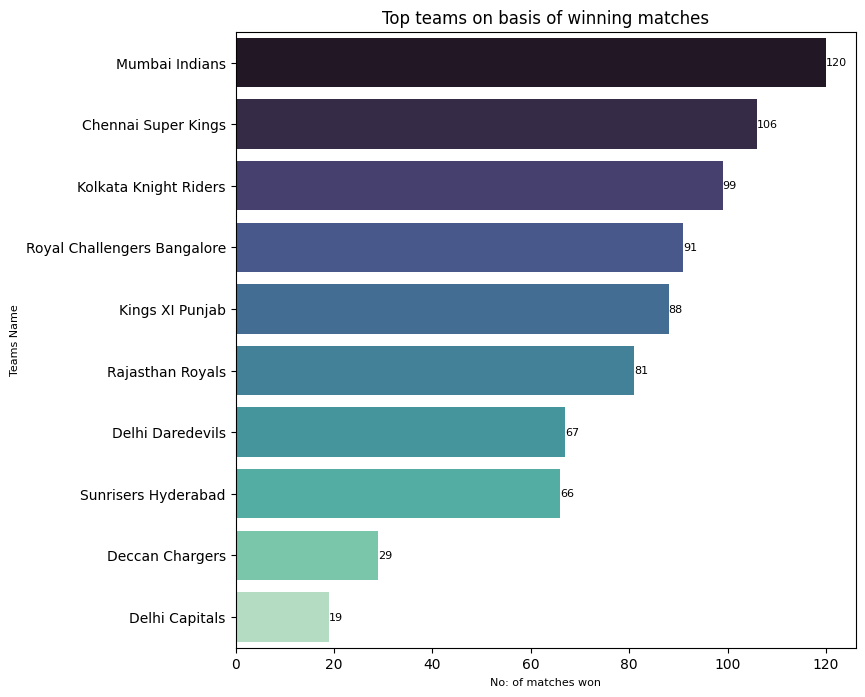

In [ ]:
wins = matchdf['winner'].value_counts()
wins = wins.head(10)
plt.figure(figsize=(8,8))
c1 = sns.countplot(y='winner',order=wins.index,data = matchdf,palette = 'mako')
c1.bar_label(c1.containers[0],size = 8)
plt.ylabel('Teams Name',fontsize=8)
plt.xlabel('No: of matches won',fontsize=8)
plt.title('Top teams on basis of winning matches',fontsize=12)
plt.show()

**Head to Head match win percentage**

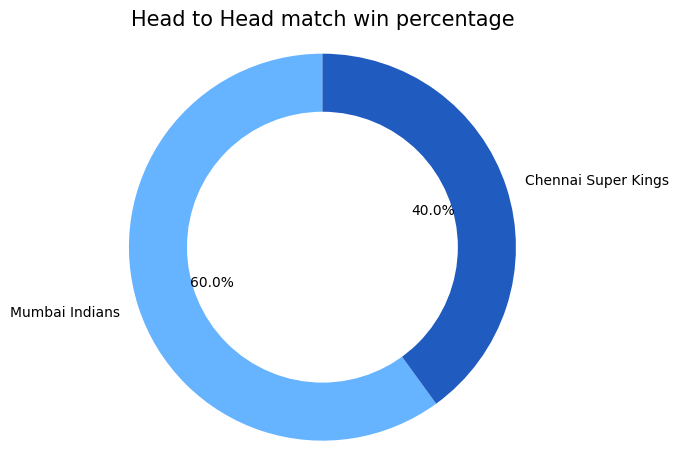

In [ ]:
# Calculate the number of wins for each team
team1win = matchstatdf[matchstatdf['winner'] == team1].shape[0]
team2win = matchstatdf[matchstatdf['winner'] == team2].shape[0]

# Calculate the percentage of wins for each team
team1winper = (team1win / totplay) * 100
team2winper = (team2win / totplay) * 100

# Plot
slices = [team1win, team2win]
labels = [team1, team2]
colors = ['#66b3ff', '#205bc0', '#94b5ef']

fig1, ax1 = plt.subplots()
ax1.pie(slices, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Head to Head match win percentage", fontsize=15)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

**Head to Head match win percentage when toss is won**

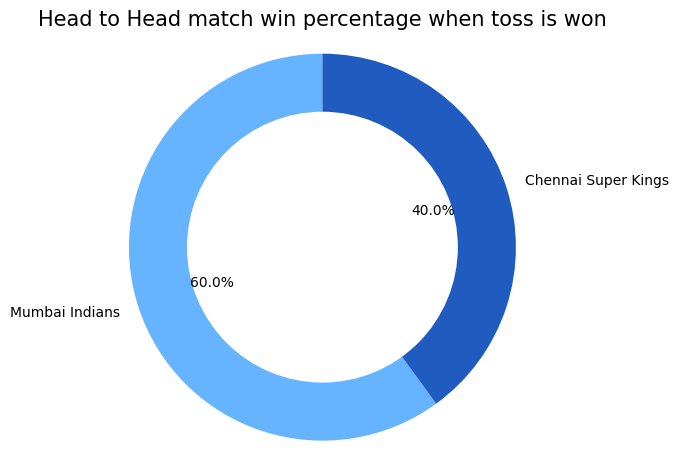

In [ ]:
# Filtering the dataframe based on teams and venue
matchstatdf = matchdf[((matchdf.team1 == team1) & (matchdf.team2 == team2)) | ((matchdf.team1 == team2) & (matchdf.team2 == team1))]

# Number of matches played
totplay = len(matchstatdf)

# Percentage match wins head to head
team1win = len(matchstatdf[matchstatdf.winner == team1])
team2win = len(matchstatdf[matchstatdf.winner == team2])

# Plot
slices=[team1win,team2win]
labels=[team1,team2]
colors = ['#66b3ff','#205bc0','#94b5ef']

# If team1 wins toss, win percentage
toss_win1 = len(matchstatdf[(matchstatdf.toss_winner == team1) & (matchstatdf.winner == team1)])
# If team2 wins toss, win percentage
toss_win2 = len(matchstatdf[(matchstatdf.toss_winner == team2) & (matchstatdf.winner == team2)])


fig1, ax1 = plt.subplots()
ax1.pie(slices, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Head to Head match win percentage when toss is won", fontsize=15)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()


**No of ball faced, total run and strike rate of a batsman**

In [ ]:
input_batsman = 'SK Raina'
input_bowler = 'SL Malinga'

batbowldf = balldf[(balldf['batsman'] == input_batsman) & (balldf['bowler'] == input_bowler)]

ballsf = len(batbowldf)  # Number of balls faced
print("Number of balls faced: %.2f" % ballsf)

totruns = batbowldf['batsman_runs'].sum()  # Total runs scored
print("Total runs Scored: %.2f" % totruns)

sr = (totruns / ballsf) * 100  # Strike rate
print("Strike Rate: %.2f" % sr)

Number of balls faced: 62.00
Total runs Scored: 71.00
Strike Rate: 114.52


**Number of times a bowler dismissed a batsman**

In [ ]:
# Number of times bowler dismissed batsman
dismiss = len(batbowldf[batbowldf['is_wicket'] != 0])
print("Number of times bowler dismissed batsman: %.f" % dismiss)

# Number of boundaries scored
boundaries = len(batbowldf[batbowldf['batsman_runs'].isin([4, 6])])
print("Number of boundaries scored: %.f" % boundaries)

Number of times bowler dismissed batsman: 2
Number of boundaries scored: 7


# ML Model

**Create train and test dataset**

In [ ]:
sorted_balldf = balldf.sort_values('id')
sorted_balldf['rank'] = sorted_balldf['id'].apply(lambda x: percentileofscore(sorted_balldf['id'], x) / 100)

train_balldf = sorted_balldf[sorted_balldf['rank'] <= 0.8].drop('rank', axis=1)
test_balldf = sorted_balldf[sorted_balldf['rank'] > 0.8].drop('rank', axis=1)

**Train Dataset - Feature Extraction**

In [ ]:
# Group all batsman together and count number of ball faced
batgroup_train = train_balldf.groupby('batsman')
batdf = batgroup_train.size().reset_index(name='ball_faced')

# Count number of innings played by each batsman
innings_df = train_balldf.groupby('batsman')['id'].nunique().reset_index(name='Innings')
joined_df_train = pd.merge(batdf, innings_df, on='batsman', how='left')

# Filter run scores in "4" and "6" and create count for each batsman
four = train_balldf[train_balldf['batsman_runs'] == 4]
four_df = four.groupby('batsman').size().reset_index(name='Fours')
joined_df_train = pd.merge(joined_df_train, four_df, on='batsman', how='left')

sixes = train_balldf[train_balldf['batsman_runs'] == 6]
sixes_df = sixes.groupby('batsman').size().reset_index(name='Sixes')
joined_df_train = pd.merge(joined_df_train, sixes_df, on='batsman', how='left')

In [ ]:
# Calculate batsman average
player_dismissed = train_balldf.groupby('player_dismissed').size().reset_index(name='count')
total_runs = train_balldf.groupby('batsman')['batsman_runs'].sum().reset_index(name='Total_runs')
joined_data = pd.merge(player_dismissed, total_runs, left_on='player_dismissed', right_on='batsman', how='inner')
joined_data['Batsmen Avg'] = joined_data['Total_runs'] / joined_data['count']
avg_df = joined_data.sort_values(by='Batsmen Avg', ascending=False)[['batsman', 'Batsmen Avg']]
joined_df_train = pd.merge(joined_df_train, avg_df, on='batsman', how='left')

# Calculate batsman total runs and strike rate
total_runs = train_balldf.groupby('batsman')['batsman_runs'].sum().reset_index(name='Total_runs')
joined_df_train = pd.merge(joined_df_train, total_runs, on='batsman', how='left')

# Calculate strike rate
joined_df_train['Strike rate'] = joined_df_train['Total_runs'] * 100 / joined_df_train['ball_faced']

# Calculate runs per match
joined_df_train['Runs_per_match'] = joined_df_train['Total_runs'] / joined_df_train['Innings']

# Fill missing values with 0
joined_df_train.fillna(0, inplace=True)
joined_df_train.head()

,batsman,ball_faced,Innings,Fours,Sixes,Batsmen Avg,Total_runs,Strike rate,Runs_per_match
0,A Ashish Reddy,196,23,16.0,15.0,18.666667,280,142.857143,12.173913
1,A Chandila,7,2,0.0,0.0,0.000000,4,57.142857,2.000000
2,A Chopra,75,6,7.0,0.0,8.833333,53,70.666667,8.833333
3,A Choudhary,20,3,1.0,1.0,25.000000,25,125.000000,8.333333
4,A Dananjaya,5,1,0.0,0.0,0.000000,4,80.000000,4.000000


**Test Dataset - Feature Extraction**

In [ ]:
# Group all batsman together and count number of ball faced
batgroup_test = test_balldf.groupby('batsman')
batdf = batgroup_test.size().reset_index(name='ball_faced')

# Count number of innings played by each batsman
innings_df = test_balldf.groupby('batsman')['id'].nunique().reset_index(name='Innings')
joined_df_test = pd.merge(batdf, innings_df, on='batsman', how='left')

# Filter run scores in "4" and "6" and create count for each batsman
four = test_balldf[test_balldf['batsman_runs'] == 4]
four_df = four.groupby('batsman').size().reset_index(name='Fours')
joined_df_test = pd.merge(joined_df_test, four_df, on='batsman', how='left')

sixes = test_balldf[test_balldf['batsman_runs'] == 6]
sixes_df = sixes.groupby('batsman').size().reset_index(name='Sixes')
joined_df_test = pd.merge(joined_df_test, sixes_df, on='batsman', how='left')

In [ ]:
# Calculate batsman average
player_dismissed = test_balldf.groupby('player_dismissed').size().reset_index(name='count')
total_runs = test_balldf.groupby('batsman')['batsman_runs'].sum().reset_index(name='Total_runs')
joined_data = pd.merge(player_dismissed, total_runs, left_on='player_dismissed', right_on='batsman', how='inner')
joined_data['Batsmen Avg'] = joined_data['Total_runs'] / joined_data['count']
avg_df = joined_data.sort_values(by='Batsmen Avg', ascending=False)[['batsman', 'Batsmen Avg']]
joined_df_test = pd.merge(joined_df_test, avg_df, on='batsman', how='left')

# Calculate batsman total runs and strike rate
total_runs = test_balldf.groupby('batsman')['batsman_runs'].sum().reset_index(name='Total_runs')
joined_df_test = pd.merge(joined_df_test, total_runs, on='batsman', how='left')

# Calculate strike rate
joined_df_test['Strike rate'] = joined_df_test['Total_runs'] * 100 / joined_df_test['ball_faced']

# Calculate runs per match
joined_df_test['Runs_per_match'] = joined_df_test['Total_runs'] / joined_df_test['Innings']

# Fill missing values with 0
joined_df_test.fillna(0, inplace=True)
joined_df_test.head()

,batsman,ball_faced,Innings,Fours,Sixes,Batsmen Avg,Total_runs,Strike rate,Runs_per_match
0,A Mishra,28,5,2.0,0.0,11.000000,22,78.571429,4.400000
1,A Nortje,6,3,0.0,0.0,7.000000,7,116.666667,2.333333
2,AB de Villiers,743,33,89.0,64.0,46.560000,1164,156.662180,35.272727
3,AD Hales,119,6,13.0,6.0,24.666667,148,124.369748,24.666667
4,AD Nath,71,6,6.0,2.0,11.666667,70,98.591549,11.666667


In [ ]:
# Filtering out test 'batsman' data for which in training 'batsman' is not present
only_test = pd.merge(joined_df_test, joined_df_train[['batsman']], on='batsman', how='left', indicator=True)
only_test = only_test[only_test['_merge'] == 'left_only'][['batsman']]
# Dropping 'batsman' in test data which were not present in training set 'batsman'
final_test = pd.merge(joined_df_test, only_test, on='batsman', how='left', indicator=True)
final_test = final_test[final_test['_merge'] == 'left_only'].drop(columns='_merge')

In [ ]:
final_test.head()

,batsman,ball_faced,Innings,Fours,Sixes,Batsmen Avg,Total_runs,Strike rate,Runs_per_match
0,A Mishra,28,5,2.0,0.0,11.000000,22,78.571429,4.400000
2,AB de Villiers,743,33,89.0,64.0,46.560000,1164,156.662180,35.272727
4,AD Nath,71,6,6.0,2.0,11.666667,70,98.591549,11.666667
5,AD Russell,458,31,52.0,73.0,31.200000,780,170.305677,25.161290
6,AJ Finch,348,18,33.0,15.0,21.555556,388,111.494253,21.555556


**Linear Regression Model**

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

df_train_X = joined_df_train.drop(['batsman','Runs_per_match'],axis=1)
df_train_Y = joined_df_train['Runs_per_match']
# Train the model using the training sets
lr_model=regr.fit(df_train_X, df_train_Y)

# Make predictions using the testing set
y_true = final_test['Runs_per_match']
df_test_final = final_test.drop(['batsman','Runs_per_match'],axis=1)
y_pred = lr_model.predict(df_test_final)

mse = mean_squared_error(y_true, y_pred,squared=False)
print("MSE: %.2f" % mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_true, y_pred))

MSE: 4.14
Coefficient of determination: 0.85


**Random Forest Model**

In [ ]:
# creating a RF classifier
regr = RandomForestRegressor(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
regr.fit(df_train_X, df_train_Y)
  
# performing predictions on the test dataset
y_pred = regr.predict(df_test_final)
  
# using metrics module for accuracy calculation
mse = mean_squared_error(y_true,y_pred,squared=False)
 
print("MSE: %.2f" % mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_true, y_pred))

MSE: 3.33
Coefficient of determination: 0.90


**Gradient Boost Model**

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01)
# with default parameters
gbr = GradientBoostingRegressor()
gbr_model=gbr.fit(df_train_X, df_train_Y)

In [ ]:
y_pred = gbr.predict(df_test_final)
mse = mean_squared_error(y_true,y_pred,squared=False)
 
print("MSE: %.2f" % mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_true, y_pred))

MSE: 2.83
Coefficient of determination: 0.93


#Demo

In [ ]:
final_test['y_pred'] = y_pred

In [ ]:
final_test

,batsman,ball_faced,Innings,Fours,Sixes,Batsmen Avg,Total_runs,Strike rate,Runs_per_match,y_pred
0,A Mishra,28,5,2.0,0.0,11.000000,22,78.571429,4.400000,5.513464
2,AB de Villiers,743,33,89.0,64.0,46.560000,1164,156.662180,35.272727,30.515347
4,AD Nath,71,6,6.0,2.0,11.666667,70,98.591549,11.666667,8.951090
5,AD Russell,458,31,52.0,73.0,31.200000,780,170.305677,25.161290,25.665934
6,AJ Finch,348,18,33.0,15.0,21.555556,388,111.494253,21.555556,17.487278
...,...,...,...,...,...,...,...,...,...,...
195,WP Saha,270,15,44.0,7.0,30.416667,365,135.185185,24.333333,24.112912
196,Washington Sundar,109,13,11.0,3.0,14.000000,126,115.596330,9.692308,9.760466
199,YK Pathan,223,17,16.0,11.0,25.000000,250,112.107623,14.705882,16.107378
200,YS Chahal,25,6,0.0,0.0,2.333333,7,28.000000,1.166667,1.656950


In [ ]:
TEAM_A = ['AT Rayudu','F du Plessis','SM Curran','MS Dhoni','M Vijay','SR Watson','DL Chahar', 'SM Curran', 'L Ngidi', 'PP Chawla', 'RA Jadeja']

In [ ]:
TEAM_B = ['RG Sharma','AM Rahane','SA Yadav','HH Pandya','KA Pollard','SK Raina','KM Jadhav','KH Pandya' ,'AM Rahane','RA Tripathi']

In [ ]:
final_output_A = final_test[final_test["batsman"].isin(TEAM_A)]
# pd.set_option('display.max_rows', final_output_A.shape[0]+1)
print(final_output_A)

          batsman  ball_faced  Innings  Fours  Sixes  Batsmen Avg  Total_runs  \
14      AT Rayudu         916       40   89.0   50.0    36.161290        1121   
42      DL Chahar          51        8    2.0    4.0    12.800000          64   
50   F du Plessis         785       31   95.0   35.0    37.296296        1007   
102       M Vijay         105        5   10.0    1.0    19.200000          96   
116      MS Dhoni         728       35   54.0   54.0    59.812500         957   
138     PP Chawla          68        8    5.0    3.0    11.166667          67   
144     RA Jadeja         279       24   30.0   17.0    34.818182         383   
173     SR Watson         842       39  104.0   58.0    29.108108        1077   

     Strike rate  Runs_per_match     y_pred  
14    122.379913       28.025000  28.032984  
42    125.490196        8.000000   7.426248  
50    128.280255       32.483871  31.996712  
102    91.428571       19.200000  16.558675  
116   131.456044       27.342857  30.839

In [ ]:
final_output_B = final_test[final_test["batsman"].isin(TEAM_B)]
print(final_output_B)

         batsman  ball_faced  Innings  Fours  Sixes  Batsmen Avg  Total_runs  \
9      AM Rahane         615       30   77.0   13.0    26.071429         730   
58     HH Pandya         563       38   59.0   63.0    36.080000         902   
83    KA Pollard         404       29   36.0   49.0    38.058824         647   
86     KH Pandya         356       34   40.0   17.0    18.250000         438   
91     KM Jadhav         240       17   26.0    3.0    18.666667         224   
145  RA Tripathi         432       25   47.0   18.0    24.136364         531   
148    RG Sharma         715       37   90.0   34.0    26.029412         885   
162     SA Yadav         965       40  152.0   34.0    36.914286        1292   
165     SK Raina         626       29   82.0   20.0    30.560000         764   

     Strike rate  Runs_per_match     y_pred  
9     118.699187       24.333333  24.989070  
58    160.213144       23.736842  23.250337  
83    160.148515       22.310345  23.330126  
86    123.03370

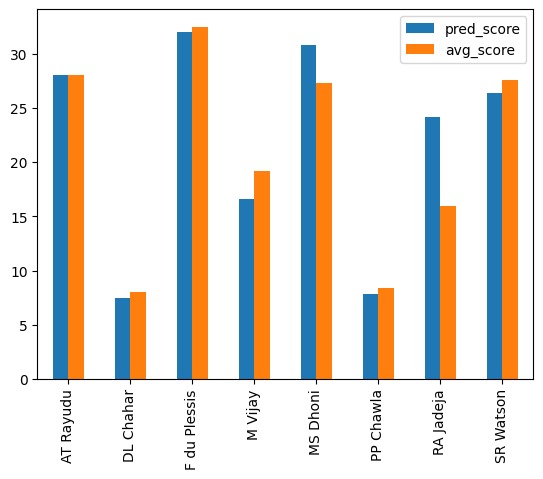

In [ ]:
batsman= final_output_A['batsman'].tolist()
avg_score= final_output_A['Runs_per_match'].tolist()
pred_score = final_output_A['y_pred'].tolist()
import pandas as pd
df = pd.DataFrame({'pred_score': pred_score,
                   'avg_score': avg_score}, index=batsman)
ax = df.plot.bar(rot='vertical')